# Projet Traitement et Données Large Échelle

Zoé MARQUIS & Charlotte KRUZIC

## Comparaison de Performances entre Systèmes Relationnels et NoSQL : Étude de Cas avec le Catalogue Netflix

Dans ce projet, nous comparons les performances entre un système de base de données relationnel (SQLite) et un système NoSQL (Cassandra), en utilisant le **catalogue Netflix** comme jeu de données. Ce dataset, disponible en Open Data, offre une structure réaliste et adaptée pour explorer les différences entre ces deux approches de gestion de données. L'objectif principal est d'évaluer les performances pour des opérations d'insertion, mise à jour et requêtes complexes, tout en analysant les spécificités du système NoSQL choisi.

### Jeu de données

Le jeu de données utilisé contient des informations sur les films et séries disponibles sur Netflix, avec les attributs suivants :
    - `show_id` : Id unique pour chaque enregistrement
    - `title` : Le titre
    - `release_year` : L'année de sortie
    - `rating` : La classification
    - `duration` : La durée ou nombre de saisons (pour les séries)
    - `listed_in` : Les catégories

TODO : pourquoi ce choix

### Schéma de données

#### Structure relationnelle (SQLite)

Dans SQLite, nous utilisons une structure relationnelle classique avec les attributs définis dans une table principale, où chaque colonne correspond à un type de donnée bien spécifié. Des index sont également créés sur des colonnes clés pour optimiser les performances des requêtes fréquentes.

TODO : remplir correctement les tables par rappotr à la suite
```sql
CREATE TABLE netflix (
    show_id VARCHAR(255) PRIMARY KEY,
    title VARCHAR(255),
    release_year INT,
    rating VARCHAR(50),
    duration VARCHAR(50),
    listed_in VARCHAR(255)
);
```


#### Structure NoSQL (Cassandra)

Pour Cassandra, nous adoptons une approche orientée colonnes, en structurant les données pour des accès rapides et efficaces selon les cas d'utilisation spécifiques.
La structure NoSQL sera définie comme suit :

```sql
CREATE TABLE netflix (
    show_id TEXT PRIMARY KEY,
    title TEXT,
    release_year INT,
    rating TEXT,
    duration TEXT,
    listed_in TEXT
);
```


TODO ; checker qu'on fait bien ça par la suite



### Comparaison des schémas
Le schéma relationnel est rigide et suit une normalisation stricte pour assurer la cohérence des données, tandis que Cassandra offre plus de flexibilité dans la structure des colonnes, permettant une meilleure scalabilité horizontale.

TODO : expliciter ça

TODO : véifier

---

### Modèle de données de Cassandra

Cassandra repose sur un modèle basé sur des colonnes plutôt que sur des documents (comme MongoDB) ou des paires clé-valeur (comme Redis).

#### Keyspace
Un Keyspace dans Cassandra peut être vu comme un espace de noms, similaire à une base de données dans les systèmes relationnels. Il permet de regrouper plusieurs tables (ou Column Families). Chaque Keyspace définit des propriétés de réplication, comme le nombre de répliques des données.

#### Column Family
Les Column Families dans Cassandra ressemblent aux tables en SQL, mais avec une flexibilité accrue dans la structure des données. Une Column Family contient plusieurs colonnes, mais contrairement aux tables relationnelles, les colonnes ne doivent pas nécessairement être définies à l'avance. Elles peuvent être ajoutées dynamiquement avec des noms et des valeurs.

#### Key
Chaque ligne dans une Column Family est identifiée par une clé unique (par exemple, show_id dans votre jeu de données Netflix). Cela permet d'identifier rapidement les enregistrements sans avoir à faire de jointures complexes comme dans une base de données relationnelle.

#### Colonnes
Dans Cassandra, les données sont stockées sous forme de colonnes avec 3 composants essentiels :

- Nom : le nom de la colonne  
- Valeur : la donnée elle-même  
- Timestamp : un marqueur temporel qui permet de gérer les versions des données (utile pour les mises à jour et les conflits de réplication).  
Chaque colonne dans Cassandra est un enregistrement indépendant et peut être insérée, mise à jour ou supprimée sans affecter les autres colonnes dans la même ligne.

#### Super Colonnes
Les Super Colonnes permettent une structure encore plus flexible et imbriquée, un peu comme les données hiérarchiques. Une Super Colonne est une collection de colonnes et peut être vue comme une ligne composée de plusieurs colonnes nommées. Ce mécanisme est particulièrement utile pour des cas d'utilisation complexes où plusieurs attributs doivent être regroupés sous une même clé.

TODO : à vérifier

### Choix de Cassandra pour ce projet

Cassandra est un système de gestion de base de données NoSQL particulièrement adapté aux applications nécessitant une haute disponibilité et une scalabilité horizontale. Voici les principaux points qui justifient son choix pour ce projet, en comparaison avec d'autres systèmes NoSQL comme MongoDB ou Redis :

- **Scalabilité horizontale**  
Cassandra est conçu pour être hautement scalable, ce qui signifie qu'il peut facilement gérer de grandes quantités de données en ajoutant simplement plus de nœuds à son cluster, sans interruption de service. Contrairement à des bases comme MongoDB, qui peut rencontrer des limitations de scalabilité avec des configurations complexes de réplication et de sharding, Cassandra simplifie cette gestion.

- **Haute disponibilité et tolérance aux pannes**  
Cassandra offre une réplication native des données sur plusieurs nœuds, ce qui assure une disponibilité continue même en cas de panne de serveur ou de nœud. Ce mécanisme de réplication est essentiel dans les applications à grande échelle où la perte de données ou l'indisponibilité du service n'est pas acceptable. Ce niveau de résilience n'est pas aussi robuste dans des systèmes comme Redis, qui est plus adapté pour les caches en mémoire.

- **Modèle de données flexible**  
Cassandra adopte un modèle de données basé sur des colonnes plutôt que sur des documents (MongoDB) ou des paires clé-valeur (Redis), ce qui le rend particulièrement adapté pour les cas où la structure des données peut évoluer au fil du temps. De plus, bien que non relationnel, Cassandra permet une organisation des données en tables et index, offrant plus de structure que des systèmes comme CouchDB.

TODO : explication plus détaillée dans la cellule précédente

- **Performances optimisées pour les écritures massives**  
Cassandra est optimisé pour des opérations d'écriture à grande échelle, ce qui en fait un excellent choix pour des applications générant de grandes quantités de données en continu (comme les logs, les événements ou les analyses de séries temporelles). Contrairement à MongoDB, qui peut être plus performant pour les lectures complexes, Cassandra excelle dans les insertions et les mises à jour rapides.

- **Adapté aux cas d'utilisation distribués**
Étant un système distribué par nature, Cassandra est idéal pour des architectures distribuées et géographiquement décentralisées. Son approche de la gestion des données et de la réplication est particulièrement utile lorsque les données doivent être distribuées sur des data centers multiples, un point que d'autres bases NoSQL, comme Couchbase, ne gèrent pas aussi efficacement.

**En résumé :**
Cassandra est un excellent choix pour ce projet en raison de sa capacité à gérer des volumes de données massifs, sa scalabilité horizontale, sa tolérance aux pannes, et ses performances exceptionnelles pour les écritures. Ces caractéristiques en font un candidat idéal pour des applications nécessitant des performances de lecture/écriture rapides et une disponibilité continue, contrairement à d'autres systèmes NoSQL comme MongoDB ou Redis qui peuvent avoir des avantages dans d'autres cas d'usage.



**optimisé pour les opérations d'insertion massives.**

---
## Installer les outils

In [1]:
!pip install plotly 

In [ ]:
!pip install matplotlib

In [2]:
!pip install pandas
# pour manipuler des dataframes et charger les données de kaggle

In [3]:
!pip install cassandra-driver

In [4]:
# TODO à vérifier des 2 cotés
# # 🚨 sur linux 
# !apt-get update
# !apt-get install -y openjdk-11-jdk
# !apt-get install libev-dev
# !apt-get install cassandra

# # 🚨 sur mac
# !brew install openjdk@17
# !brew install libev
# !brew install cassandra


In [5]:
!pip install kagglehub
# installer kagglehub pour récupérer le dataset

In [6]:
!pip install tabulate

## Importation des données

In [7]:
import kagglehub

path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Chemin vers le fichier du dataset : ", path)

Chemin vers le fichier du dataset :  /Users/zoemarquis/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [8]:
import os
files = os.listdir(path)
print("Nom du fichier : ", files)

Nom du fichier :  ['netflix_titles.csv']


In [9]:
import pandas as pd

filename = f"{path}/{files[0]}"
df_initial = pd.read_csv(filename)

In [10]:
from tabulate import tabulate

print(tabulate(df_initial.head(10), headers='keys', tablefmt='psql'))

+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | show_id   | type    | title                            | director                      | cast                                                                                                                                                

In [11]:
# afficher le nombre de lignes dans le dataset
print(f"Nombre de lignes : {len(df_initial)}")

Nombre de lignes : 8807


In [12]:
# types des colonnes
print(df_initial.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [13]:
# Convertir la colonne show_id en int en enlevant le préfixe 's' (plus simple pour gérer exactement le meme type de données en Cassandra et MySQL)
df_initial['show_id'] = df_initial['show_id'].str.replace('s', '').astype(int).astype(int)

df_initial['show_id'] = df_initial['show_id'].astype(int)
df_initial['release_year'] = df_initial['release_year'].astype(int)

df_initial['type'] = df_initial['title'].astype(str)
df_initial['title'] = df_initial['title'].astype(str)
df_initial['director'] = df_initial['director'].astype(str)
df_initial['cast'] = df_initial['cast'].astype(str)
df_initial['country'] = df_initial['country'].astype(str)
df_initial['date_added'] = df_initial['date_added'].astype(str)
df_initial['rating'] = df_initial['rating'].astype(str)
df_initial['duration'] = df_initial['duration'].astype(str)
df_initial['listed_in'] = df_initial['listed_in'].astype(str)
df_initial['description'] = df_initial['description'].astype(str)

In [14]:
# types des colonnes
print(df_initial.dtypes)

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


## CRUD : Create, Read, Update, Delete
- Create (*Insert*) : Insérer des données dans la base de données.
- Read (*Select*) : Récupérer des données.
- Update (*Update*) : Modifier des données existantes.
- Delete (*Delete*) : Effacer des données.

In [15]:
schema = """
CREATE TABLE IF NOT EXISTS shows (
    show_id INT PRIMARY KEY,
    title TEXT,
    type TEXT,
    director TEXT,
    cast TEXT,
    country TEXT,
    date_added TEXT,
    release_year INT,
    rating TEXT,
    duration TEXT,
    listed_in TEXT,
    description TEXT
);
"""

In [16]:
data_zoe_charlotte = {
    'show_id': [0],
    'title': ['Zoé & Charlotte'],
    'type': ['Movie'],
    'director': ['Christopher Nolan'],
    'cast': ['Leonardo DiCaprio, Joseph Gordon-Levitt'],
    'country': ['USA'],
    'date_added': ['2021-01-01'],
    'release_year': [2001],
    'rating': ['PG-13'],
    'duration': ['148 min'],
    'listed_in': ['Action, Sci-Fi'],
    'description': ['A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a CEO.']
}
df_zoe_charlotte = pd.DataFrame(data_zoe_charlotte)

### SQLite

In [17]:
import sqlite3

# Créer une base de données SQLite en mémoire
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

def drop_table_sqlite():
    cursor.execute("DROP TABLE IF EXISTS shows;")
    conn.commit()

def create_table_sqlite():
    # Crée ta table ici
    cursor.execute(schema)
    conn.commit()

drop_table_sqlite()
create_table_sqlite()


In [ ]:
import time

# --- CREATE ---
def sqlite_insert(df):
    drop_table_sqlite()
    create_table_sqlite()
    columns = ', '.join(df.columns)
    placeholders = ', '.join(['?'] * len(df.columns))
    insert_query = f"INSERT INTO shows ({columns}) VALUES ({placeholders})"

    start_time = time.time()
    for _, row in df.iterrows():
      cursor.execute(insert_query, tuple(row))
    conn.commit()

    create_time_sqlite = time.time() - start_time
    print(f"Create Time: {create_time_sqlite:.6f} seconds")
    return create_time_sqlite

# --- READ ---
def sqlite_read(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("SELECT * FROM shows WHERE release_year > 2000")
    result = cursor.fetchall()
    read_time_sqlite = time.time() - start_time
    print(f"Read Time: {read_time_sqlite:.6f} seconds")
    print(f"Queried {len(result)} records")
    return read_time_sqlite

# --- UPDATE ---
def sqlite_update(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("UPDATE shows SET rating='PG' WHERE release_year > 2000")
    conn.commit()
    update_time_sqlite = time.time() - start_time
    print(f"Update Time: {update_time_sqlite:.6f} seconds")
    return update_time_sqlite

# --- DELETE ---
def sqlite_delete(df):
    # drop_table_sqlite()
    # create_table_sqlite()
    sqlite_insert(df)
    start_time = time.time()
    cursor.execute("DELETE FROM shows WHERE release_year > 2000")
    conn.commit()
    delete_time_sqlite = time.time() - start_time
    print(f"Delete Time: {delete_time_sqlite:.6f} seconds")
    return delete_time_sqlite

In [19]:
import numpy as np

# Fonction pour effectuer une opération plusieurs fois et calculer la moyenne et l'écart-type
def benchmark_operation(func, *args):
    times = []
    for _ in range(5):  # Effectuer 5 itérations
        times.append(func(*args))  # Exécuter la fonction avec les arguments
    
    # Calculer la moyenne et l'écart-type
    mean_time = np.mean(times)
    std_time = np.std(times)
    return mean_time, std_time

# --- CREATE ---
create_sqlite_mean, create_sqlite_std = benchmark_operation(sqlite_insert, df_zoe_charlotte)
print(f"CREATE: Mean Time = {create_sqlite_mean:.6f}s, Std Time = {create_sqlite_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_mean, read_sqlite_std = benchmark_operation(sqlite_read, df_zoe_charlotte)
print(f"READ: Mean Time = {read_sqlite_mean:.6f}s, Std Time = {read_sqlite_std:.6f}s")

# --- UPDATE ---
update_sqlite_mean, update_sqlite_std = benchmark_operation(sqlite_update, df_zoe_charlotte)
print(f"UPDATE: Mean Time = {update_sqlite_mean:.6f}s, Std Time = {update_sqlite_std:.6f}s")

# --- DELETE ---
delete_sqlite_mean, delete_sqlite_std = benchmark_operation(sqlite_delete, df_zoe_charlotte)
print(f"DELETE: Mean Time = {delete_sqlite_mean:.6f}s, Std Time = {delete_sqlite_std:.6f}s")

Create Time: 0.000321 seconds
Create Time: 0.000414 seconds
Create Time: 0.000084 seconds
Create Time: 0.000049 seconds
Create Time: 0.000049 seconds
CREATE: Mean Time = 0.000183s, Std Time = 0.000154s
Total rows in 'shows' table: 1
Create Time: 0.000044 seconds
Read Time: 0.000010 seconds
Queried 1 records
Create Time: 0.000036 seconds
Read Time: 0.000012 seconds
Queried 1 records
Create Time: 0.000034 seconds
Read Time: 0.000009 seconds
Queried 1 records
Create Time: 0.000031 seconds
Read Time: 0.000008 seconds
Queried 1 records
Create Time: 0.000032 seconds
Read Time: 0.000008 seconds
Queried 1 records
READ: Mean Time = 0.000009s, Std Time = 0.000002s
Create Time: 0.000035 seconds
Update Time: 0.000007 seconds
Create Time: 0.000032 seconds
Update Time: 0.000005 seconds
Create Time: 0.000032 seconds
Update Time: 0.000005 seconds
Create Time: 0.000030 seconds
Update Time: 0.000004 seconds
Create Time: 0.000028 seconds
Update Time: 0.000004 seconds
UPDATE: Mean Time = 0.000005s, Std Ti

TODO rédaction : on le fait sur plus de données

In [37]:
# --- CREATE ---
create_sqlite_massive_mean, create_sqlite_massive_std = benchmark_operation(sqlite_insert, df_initial)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean:.6f}s, Std Time = {create_sqlite_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean, read_sqlite_massive_std = benchmark_operation(sqlite_read, df_initial)
print(f"READ: Mean Time = {read_sqlite_massive_mean:.6f}s, Std Time = {read_sqlite_massive_std:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean, update_sqlite_massive_std = benchmark_operation(sqlite_update, df_initial)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean:.6f}s, Std Time = {update_sqlite_massive_std:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean, delete_sqlite_massive_std = benchmark_operation(sqlite_delete, df_initial)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean:.6f}s, Std Time = {delete_sqlite_massive_std:.6f}s")

Create Time: 0.107551 seconds
Create Time: 0.100729 seconds
Create Time: 0.100750 seconds
Create Time: 0.103986 seconds
Create Time: 0.100439 seconds
CREATE: Mean Time = 0.102691s, Std Time = 0.002756s
Total rows in 'shows' table: 8807
Create Time: 0.132303 seconds
Read Time: 0.011685 seconds
Queried 8245 records
Create Time: 0.104780 seconds
Read Time: 0.010905 seconds
Queried 8245 records
Create Time: 0.107852 seconds
Read Time: 0.010951 seconds
Queried 8245 records
Create Time: 0.105957 seconds
Read Time: 0.012354 seconds
Queried 8245 records
Create Time: 0.104264 seconds
Read Time: 0.010425 seconds
Queried 8245 records
READ: Mean Time = 0.011264s, Std Time = 0.000678s
Create Time: 0.103975 seconds
Update Time: 0.004322 seconds
Create Time: 0.143630 seconds
Update Time: 0.005383 seconds
Create Time: 0.109570 seconds
Update Time: 0.004888 seconds
Create Time: 0.102506 seconds
Update Time: 0.003925 seconds
Create Time: 0.103371 seconds
Update Time: 0.004276 seconds
UPDATE: Mean Time =

### Cassandra

In [21]:
# vérifier l'état actuel du noeud Cassandra
!nodetool status

Datacenter: datacenter1
Status=Up/Down
|/ State=Normal/Leaving/Joining/Moving
--  Address    Load        Tokens  Owns (effective)  Host ID                               Rack 
UN  127.0.0.1  393,05 KiB  16      100,0%            11c2e131-3642-40ab-a44b-5d5e95f42edb  rack1



In [22]:
from cassandra.cluster import Cluster

# Connexion à Cassandra
cluster = Cluster(['127.0.0.1'])
session = cluster.connect()


def drop_table_cassandra():
    session.execute("""
        DROP TABLE IF EXISTS netflix.shows;
        """)
    session.execute("""
        DROP KEYSPACE IF EXISTS netflix;
        """)

def create_table_cassandra(replication_factor):
    session.execute(f"""
        CREATE KEYSPACE netflix
        WITH REPLICATION = {{
            'class': 'SimpleStrategy', 
            'replication_factor': {replication_factor}
        }};
        """)
    session.set_keyspace('netflix')
    session.execute(schema)
    print(f"replication factor = {replication_factor}")

     
drop_table_cassandra()
create_table_cassandra(1)

replication factor = 1


TODO : pour l'instant on crée pas d'index mais on le fait après pour comparer

In [ ]:
# --- CREATE ---
def cassandra_insert(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    drop_table_cassandra()
    create_table_cassandra(nb_repl)

    insert_query = session.prepare("INSERT INTO shows (show_id, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)")

    start_time = time.time()
    for _, row in df.iterrows():
        session.execute(insert_query, (row['show_id'], row['title'], row['director'], row['cast'], row['country'], row['date_added'], row['release_year'], row['rating'], row['duration'], row['listed_in'], row['description']))
    create_time = time.time() - start_time

    print(f"Create Time: {create_time:.6f} seconds")

    return create_time

# --- READ ---
def cassandra_read(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)

    start_time = time.time()
    # On utilise ici ALLOW FILTERING car release_year ne fait pas partie de la clef primaire
    result = session.execute("SELECT * FROM shows WHERE release_year > 2000 ALLOW FILTERING")
    read_time = time.time() - start_time
    print(f"Read Time: {read_time:.6f} seconds")
    num_records = sum(1 for _ in result)  # Count rows using a generator expression
    print(f"Queried {num_records} records")
    return read_time

# --- UPDATE ---
def cassandra_update(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)

    # On doit faire select et update car realease_year ne fait pas partie de la clef primaire
    start_time = time.time()

    select_query = "SELECT show_id FROM shows WHERE release_year > 2000 ALLOW FILTERING;"
    result = session.execute(select_query)
    show_ids_to_update = [row.show_id for row in result]

    for show_id in show_ids_to_update:
        update_query = f"UPDATE shows SET rating = 'PG' WHERE show_id = {show_id};"
        session.execute(update_query)

    update_time = time.time() - start_time
    print(f"Update Time: {update_time:.6f} seconds")
    return update_time

# --- DELETE ---
def cassandra_delete(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    # drop_table_cassandra()
    # create_table_cassandra(nb_repl)
    cassandra_insert(df, nb_repl)
    
    # Comme pour update
    start_time = time.time()

    select_query = "SELECT show_id FROM shows WHERE release_year > 2000 ALLOW FILTERING;"
    result = session.execute(select_query)
    show_ids_to_delete = [row.show_id for row in result]

    for show_id in show_ids_to_delete:
        delete_query = f"DELETE FROM shows WHERE show_id = {show_id};"
        session.execute(delete_query)

    delete_time = time.time() - start_time
    print(f"Delete Time: {delete_time:.6f} seconds")
    return delete_time

In [30]:
# --- CREATE ---
create_cassandra_mean, create_cassandra_std = benchmark_operation(cassandra_insert, df_zoe_charlotte, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean:.6f}s, Std Time = {create_cassandra_std:.6f}s")

# Vérifier le nombre de lignes insérées
result = session.execute('SELECT COUNT(*) FROM shows')
row = result.one()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_mean, read_cassandra_std = benchmark_operation(cassandra_read, df_zoe_charlotte, 1)
print(f"READ: Mean Time = {read_cassandra_mean:.6f}s, Std Time = {read_cassandra_std:.6f}s")

# --- UPDATE ---
update_cassandra_mean, update_cassandra_std = benchmark_operation(cassandra_update, df_zoe_charlotte, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean:.6f}s, Std Time = {update_cassandra_std:.6f}s")

# --- DELETE ---
delete_cassandra_mean, delete_cassandra_std = benchmark_operation(cassandra_delete, df_zoe_charlotte, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean:.6f}s, Std Time = {delete_cassandra_std:.6f}s")

replication factor = 1
Create Time: 0.000594 seconds
replication factor = 1
Create Time: 0.000540 seconds
replication factor = 1
Create Time: 0.001224 seconds
replication factor = 1
Create Time: 0.000670 seconds
replication factor = 1
Create Time: 0.001062 seconds
CREATE: Mean Time = 0.000818s, Std Time = 0.000273s
Total rows in 'shows' table: 1
replication factor = 1
replication factor = 1
Create Time: 0.001285 seconds
Read Time: 0.000701 seconds
Queried 1 records
replication factor = 1
replication factor = 1
Create Time: 0.000952 seconds
Read Time: 0.000694 seconds
Queried 1 records
replication factor = 1
replication factor = 1
Create Time: 0.000631 seconds
Read Time: 0.000919 seconds
Queried 1 records
replication factor = 1
replication factor = 1
Create Time: 0.000719 seconds
Read Time: 0.000831 seconds
Queried 1 records
replication factor = 1
replication factor = 1
Create Time: 0.001834 seconds
Read Time: 0.002246 seconds
Queried 1 records
READ: Mean Time = 0.001078s, Std Time = 0.

In [31]:
# --- CREATE ---
create_cassandra_massive_mean, create_cassandra_massive_std = benchmark_operation(cassandra_insert, df_initial, 1)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean:.6f}s, Std Time = {create_cassandra_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean, read_cassandra_massive_std = benchmark_operation(cassandra_read, df_initial, 1)
print(f"READ: Mean Time = {read_cassandra_massive_mean:.6f}s, Std Time = {read_cassandra_massive_std:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean, update_cassandra_massive_std = benchmark_operation(cassandra_update, df_initial, 1)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean:.6f}s, Std Time = {update_cassandra_massive_std:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean, delete_cassandra_massive_std = benchmark_operation(cassandra_delete, df_initial, 1)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean:.6f}s, Std Time = {delete_cassandra_massive_std:.6f}s")

replication factor = 1
Create Time: 1.747217 seconds
replication factor = 1
Create Time: 1.692610 seconds
replication factor = 1
Create Time: 1.738333 seconds
replication factor = 1
Create Time: 1.700396 seconds
replication factor = 1
Create Time: 1.752409 seconds
CREATE: Mean Time = 1.726193s, Std Time = 0.024779s
Total rows in 'shows' table: 562
replication factor = 1
replication factor = 1
Create Time: 1.697603 seconds
Read Time: 0.046372 seconds
Queried 8245 records
replication factor = 1
replication factor = 1
Create Time: 1.687152 seconds
Read Time: 0.045708 seconds
Queried 8245 records
replication factor = 1
replication factor = 1
Create Time: 1.698241 seconds
Read Time: 0.050937 seconds
Queried 8245 records
replication factor = 1
replication factor = 1
Create Time: 1.691481 seconds
Read Time: 0.045989 seconds
Queried 8245 records
replication factor = 1
replication factor = 1
Create Time: 1.702868 seconds
Read Time: 0.045994 seconds
Queried 8245 records
READ: Mean Time = 0.04700

### Visualisation

TODO : rédiger

 pour faire de réelles stats on va faire les CRUD sur un nombre plus important de donnéer : insérer / lire / update / supprimer sur les données kaggle précédemment chargées

On a réalisé tout cela avec un seul replicaSet et sans index.

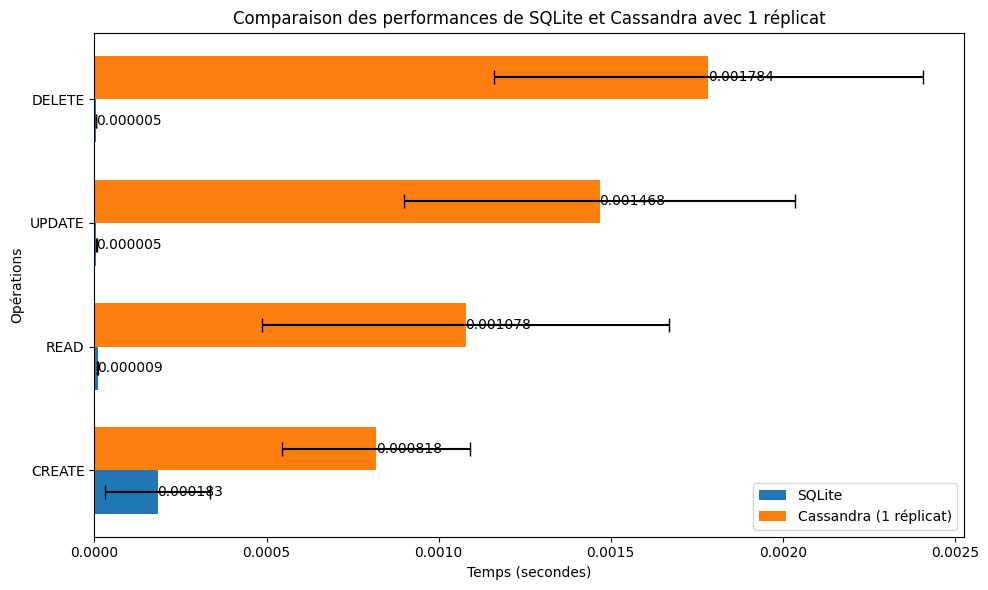

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_mean, create_sqlite_std),
    'READ': (read_sqlite_mean, read_sqlite_std),
    'UPDATE': (update_sqlite_mean, update_sqlite_std),
    'DELETE': (delete_sqlite_mean, delete_sqlite_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_mean, create_cassandra_std),
    'READ': (read_cassandra_mean, read_cassandra_std),
    'UPDATE': (update_cassandra_mean, update_cassandra_std),
    'DELETE': (delete_cassandra_mean, delete_cassandra_std)
}

# Extraire les opérations
operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

# Position des barres sur l'axe y
y = np.arange(len(operations))

# Largeur des barres
height = 0.35

# Créer un graphique horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres pour SQLite
bars1 = ax.barh(y - height / 2, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)

# Tracer les barres pour Cassandra
bars2 = ax.barh(y + height / 2, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)

# Ajouter des labels et des titres
ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec 1 réplicat')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

# Afficher les valeurs sur les barres
def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)

# Afficher le graphique
plt.tight_layout()
plt.show()


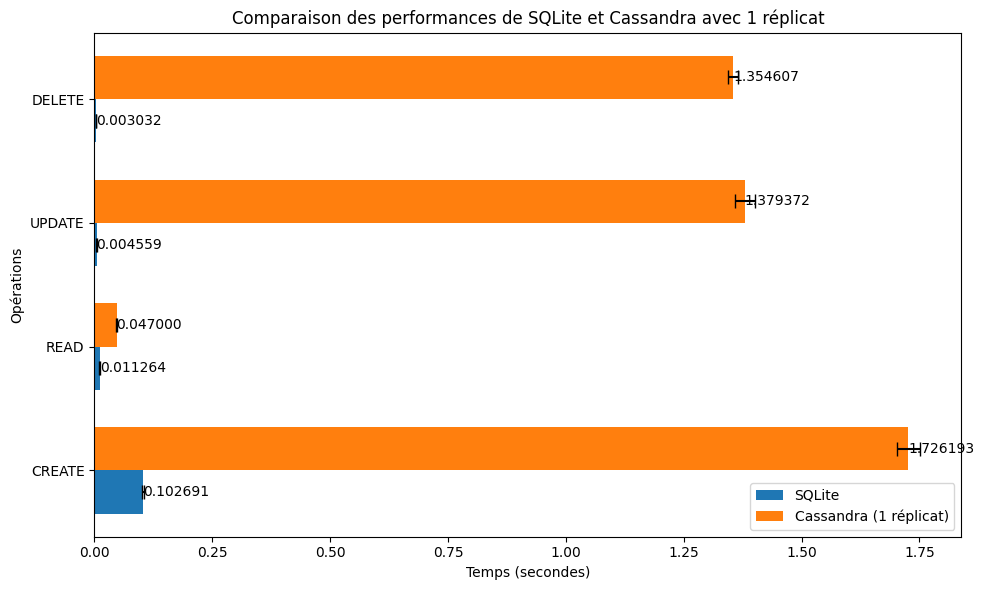

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

# Extraire les opérations
operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

# Position des barres sur l'axe y
y = np.arange(len(operations))

# Largeur des barres
height = 0.35

# Créer un graphique horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres pour SQLite
bars1 = ax.barh(y - height / 2, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)

# Tracer les barres pour Cassandra
bars2 = ax.barh(y + height / 2, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)

# Ajouter des labels et des titres
ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec 1 réplicat')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

# Afficher les valeurs sur les barres
def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)

# Afficher le graphique
plt.tight_layout()
plt.show()



TODO : rédiger commentairte sur le temps

pourquoi c'est peut etre normal ?

dire que ici cassandra c'est 1 replica set

et que y a pas d'index

on va faire sur notre dataset de 8k données

puis plus 

# TODO

## Comparaison des temps de Cassandra avec plusieurs replicaSet

##### SimpleStrategy

Description : Réplique les données de manière linéaire sur les n nœuds du cluster, où n est le replication_factor.
Avantages :
Simple à configurer.
Adapté aux environnements de test ou aux clusters d'une seule région.
Inconvénients :
Pas optimisé pour les déploiements multi-régions.
Répartition des réplicas pas toujours équilibrée en cas de cluster complexe.

In [41]:
# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2, create_cassandra_massive_std_2 = benchmark_operation(cassandra_insert, df_initial, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2:.6f}s, Std Time = {create_cassandra_massive_std_2:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_2, read_cassandra_massive_std_2 = benchmark_operation(cassandra_read, df_initial, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2:.6f}s, Std Time = {read_cassandra_massive_std_2:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2, update_cassandra_massive_std_2 = benchmark_operation(cassandra_update, df_initial, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2:.6f}s, Std Time = {update_cassandra_massive_std_2:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2 = benchmark_operation(cassandra_delete, df_initial, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2:.6f}s, Std Time = {delete_cassandra_massive_std_2:.6f}s")

replication factor = 2
Create Time: 1.745304 seconds
replication factor = 2
Create Time: 1.707139 seconds
replication factor = 2
Create Time: 1.711835 seconds
replication factor = 2
Create Time: 1.842410 seconds
replication factor = 2
Create Time: 1.741716 seconds
CREATE: Mean Time = 1.749681s, Std Time = 0.048833s
Total rows in 'shows' table: 562
replication factor = 2
replication factor = 2
Create Time: 1.800242 seconds
Read Time: 0.078779 seconds
Queried 8245 records
replication factor = 2
replication factor = 2
Create Time: 1.803719 seconds
Read Time: 0.049444 seconds
Queried 8245 records
replication factor = 2
replication factor = 2
Create Time: 1.746903 seconds
Read Time: 0.046023 seconds
Queried 8245 records
replication factor = 2
replication factor = 2
Create Time: 1.703241 seconds
Read Time: 0.045632 seconds
Queried 8245 records
replication factor = 2
replication factor = 2
Create Time: 1.726092 seconds
Read Time: 0.046065 seconds
Queried 8245 records
READ: Mean Time = 0.05318

In [42]:
# 3 replicas
# --- CREATE ---
create_cassandra_massive_mean_3, create_cassandra_massive_std_3 = benchmark_operation(cassandra_insert, df_initial, 3)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3:.6f}s, Std Time = {create_cassandra_massive_std_3:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_3, read_cassandra_massive_std_3 = benchmark_operation(cassandra_read, df_initial, 3)
print(f"READ: Mean Time = {read_cassandra_massive_mean_3:.6f}s, Std Time = {read_cassandra_massive_std_3:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_3, update_cassandra_massive_std_3 = benchmark_operation(cassandra_update, df_initial, 3)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3:.6f}s, Std Time = {update_cassandra_massive_std_3:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3 = benchmark_operation(cassandra_delete, df_initial, 3)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3:.6f}s, Std Time = {delete_cassandra_massive_std_3:.6f}s")


replication factor = 3
Create Time: 1.782714 seconds
replication factor = 3
Create Time: 1.755740 seconds
replication factor = 3
Create Time: 1.822694 seconds
replication factor = 3
Create Time: 1.782735 seconds
replication factor = 3
Create Time: 1.782409 seconds
CREATE: Mean Time = 1.785258s, Std Time = 0.021418s
Total rows in 'shows' table: 562
replication factor = 3
replication factor = 3
Create Time: 1.685507 seconds
Read Time: 0.044858 seconds
Queried 8245 records
replication factor = 3
replication factor = 3
Create Time: 1.679447 seconds
Read Time: 0.045426 seconds
Queried 8245 records
replication factor = 3
replication factor = 3
Create Time: 1.710593 seconds
Read Time: 0.045599 seconds
Queried 8245 records
replication factor = 3
replication factor = 3
Create Time: 1.803528 seconds
Read Time: 0.045728 seconds
Queried 8245 records
replication factor = 3
replication factor = 3
Create Time: 1.886075 seconds
Read Time: 0.046317 seconds
Queried 8245 records
READ: Mean Time = 0.04558

In [43]:
# 4 replicas
# --- CREATE ---
create_cassandra_massive_mean_4, create_cassandra_massive_std_4 = benchmark_operation(cassandra_insert, df_initial, 4)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4:.6f}s, Std Time = {create_cassandra_massive_std_4:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_4, read_cassandra_massive_std_4 = benchmark_operation(cassandra_read, df_initial, 4)
print(f"READ: Mean Time = {read_cassandra_massive_mean_4:.6f}s, Std Time = {read_cassandra_massive_std_4:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_4, update_cassandra_massive_std_4 = benchmark_operation(cassandra_update, df_initial, 4)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4:.6f}s, Std Time = {update_cassandra_massive_std_4:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4 = benchmark_operation(cassandra_delete, df_initial, 4)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4:.6f}s, Std Time = {delete_cassandra_massive_std_4:.6f}s")

replication factor = 4
Create Time: 1.744867 seconds
replication factor = 4
Create Time: 1.759112 seconds
replication factor = 4
Create Time: 1.777291 seconds
replication factor = 4
Create Time: 1.807430 seconds
replication factor = 4
Create Time: 1.732333 seconds
CREATE: Mean Time = 1.764207s, Std Time = 0.026288s
Total rows in 'shows' table: 562
replication factor = 4
replication factor = 4
Create Time: 1.737721 seconds
Read Time: 0.048121 seconds
Queried 8245 records
replication factor = 4
replication factor = 4
Create Time: 1.728588 seconds
Read Time: 0.047152 seconds
Queried 8245 records
replication factor = 4
replication factor = 4
Create Time: 1.745517 seconds
Read Time: 0.046397 seconds
Queried 8245 records
replication factor = 4
replication factor = 4
Create Time: 1.790584 seconds
Read Time: 0.048117 seconds
Queried 8245 records
replication factor = 4
replication factor = 4
Create Time: 1.777908 seconds
Read Time: 0.083915 seconds
Queried 8245 records
READ: Mean Time = 0.05474

In [44]:
# 5 replicas
# --- CREATE ---
create_cassandra_massive_mean_5, create_cassandra_massive_std_5 = benchmark_operation(cassandra_insert, df_initial, 5)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5:.6f}s, Std Time = {create_cassandra_massive_std_5:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_5, read_cassandra_massive_std_5 = benchmark_operation(cassandra_read, df_initial, 5)
print(f"READ: Mean Time = {read_cassandra_massive_mean_5:.6f}s, Std Time = {read_cassandra_massive_std_5:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_5, update_cassandra_massive_std_5 = benchmark_operation(cassandra_update, df_initial, 5)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5:.6f}s, Std Time = {update_cassandra_massive_std_5:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5 = benchmark_operation(cassandra_delete, df_initial, 5)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5:.6f}s, Std Time = {delete_cassandra_massive_std_5:.6f}s")

replication factor = 5
Create Time: 1.672374 seconds
replication factor = 5
Create Time: 1.709487 seconds
replication factor = 5
Create Time: 1.679229 seconds
replication factor = 5
Create Time: 1.682058 seconds
replication factor = 5
Create Time: 1.704225 seconds
CREATE: Mean Time = 1.689475s, Std Time = 0.014632s
Total rows in 'shows' table: 562
replication factor = 5
replication factor = 5
Create Time: 1.669531 seconds
Read Time: 0.045381 seconds
Queried 8245 records
replication factor = 5
replication factor = 5
Create Time: 1.692845 seconds
Read Time: 0.050436 seconds
Queried 8245 records
replication factor = 5
replication factor = 5
Create Time: 1.662019 seconds
Read Time: 0.045634 seconds
Queried 8245 records
replication factor = 5
replication factor = 5
Create Time: 1.732315 seconds
Read Time: 0.045127 seconds
Queried 8245 records
replication factor = 5
replication factor = 5
Create Time: 1.669031 seconds
Read Time: 0.045554 seconds
Queried 8245 records
READ: Mean Time = 0.04642

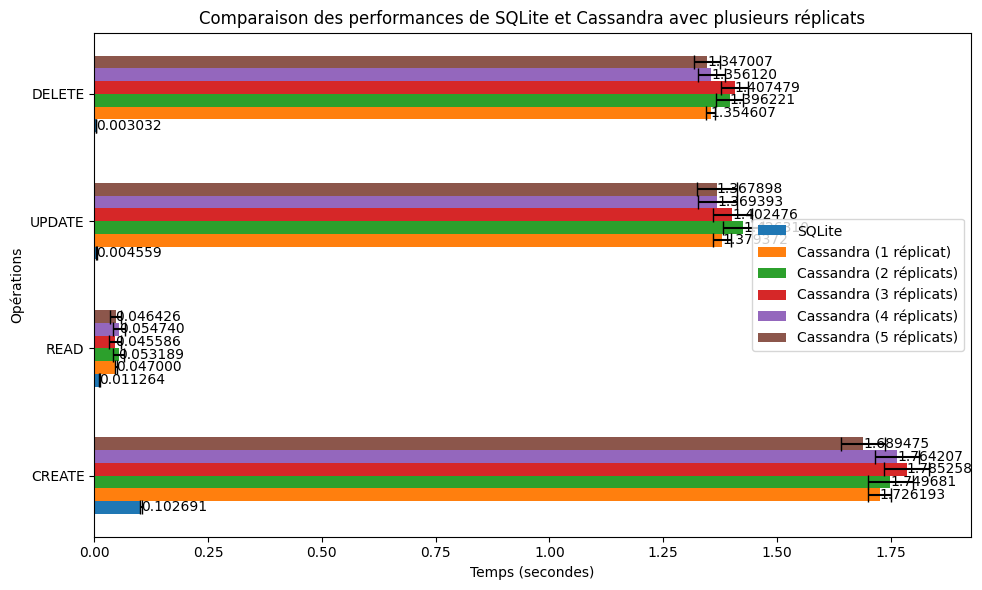

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

cassandra_times_2 = {
    'CREATE': (create_cassandra_massive_mean_2, create_cassandra_massive_std_2),
    'READ': (read_cassandra_massive_mean_2, read_cassandra_massive_std_2),
    'UPDATE': (update_cassandra_massive_mean_2, update_cassandra_massive_std_2),
    'DELETE': (delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2)
}


cassandra_times_3 = {
    'CREATE': (create_cassandra_massive_mean_3, create_cassandra_massive_std_3),
    'READ': (read_cassandra_massive_mean_3, read_cassandra_massive_std_3),
    'UPDATE': (update_cassandra_massive_mean_3, update_cassandra_massive_std_3),
    'DELETE': (delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3)
}


cassandra_times_4 = {
    'CREATE': (create_cassandra_massive_mean_4, create_cassandra_massive_std_4),
    'READ': (read_cassandra_massive_mean_4, read_cassandra_massive_std_4),
    'UPDATE': (update_cassandra_massive_mean_4, update_cassandra_massive_std_4),
    'DELETE': (delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4)
}


cassandra_times_5 = {
    'CREATE': (create_cassandra_massive_mean_5, create_cassandra_massive_std_5),
    'READ': (read_cassandra_massive_mean_5, read_cassandra_massive_std_5),
    'UPDATE': (update_cassandra_massive_mean_5, update_cassandra_massive_std_5),
    'DELETE': (delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5)
}

# Extraire les opérations
operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

cassandra_means_2 = [cassandra_times_2[op][0] for op in operations]
cassandra_stds_2 = [cassandra_times_2[op][1] for op in operations]

cassandra_means_3 = [cassandra_times_3[op][0] for op in operations]
cassandra_stds_3 = [cassandra_times_3[op][1] for op in operations]

cassandra_means_4 = [cassandra_times_4[op][0] for op in operations]
cassandra_stds_4 = [cassandra_times_4[op][1] for op in operations]

cassandra_means_5 = [cassandra_times_5[op][0] for op in operations]
cassandra_stds_5 = [cassandra_times_5[op][1] for op in operations]

# Position des barres sur l'axe y
y = np.arange(len(operations))

# Largeur des barres
height = 0.1

# Créer un graphique horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres pour SQLite et Cassandra avec réplicats
bars1 = ax.barh(y - 2.5 * height, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y - 1.5 * height, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)
bars3 = ax.barh(y - 0.5 * height, cassandra_means_2, height, xerr=cassandra_stds_2, label='Cassandra (2 réplicats)', capsize=5)

# Ajouter des barres supplémentaires pour les autres réplicats si nécessaire
bars4 = ax.barh(y + 0.5 * height, cassandra_means_3, height, xerr=cassandra_stds_2, label='Cassandra (3 réplicats)', capsize=5)
bars5 = ax.barh(y + 1.5 * height, cassandra_means_4, height, xerr=cassandra_stds_2, label='Cassandra (4 réplicats)', capsize=5)
bars6 = ax.barh(y + 2.5 * height, cassandra_means_5, height, xerr=cassandra_stds_2, label='Cassandra (5 réplicats)', capsize=5)

# Ajouter des labels et des titres
ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec plusieurs réplicats')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

# Afficher les valeurs sur les barres
def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)
add_values(bars5)
add_values(bars6)

# Afficher le graphique
plt.tight_layout()
plt.show()

 SQLite est une base de données embarquée :
SQLite est une base de données légère et locale, conçue pour fonctionner sur des systèmes où les ressources sont limitées. Elle est souvent utilisée pour des bases de données petites à moyennes, et elle est optimisée pour être rapide dans des environnements où il n'y a pas de forte concurrence ou de distribution.
Comme SQLite est embarquée, elle utilise le même processus que ton application, ce qui peut réduire les frais généraux liés aux appels réseau et aux processus séparés nécessaires pour une base de données distribuée comme Cassandra.

Replication et gestion des nœuds dans Cassandra :
L'activation de la réplication dans Cassandra, même avec des facteurs de réplication faibles, introduit une complexité supplémentaire. Le fait que Cassandra doive gérer des copies des données sur plusieurs nœuds (et potentiellement attendre des confirmations d'écriture/lecture de ces nœuds) peut ralentir les performances, surtout pour des petites bases de données.
Le facteur de réplication dans Cassandra peut augmenter le temps de réponse des écritures et lectures, car les données doivent être synchronisées entre plusieurs nœuds. Dans une petite base de données, cela peut devenir un goulot d'étranglement inutile.


Coût de gestion des partitions et de la distribution :
Cassandra est conçue pour gérer de grandes quantités de données distribuées sur plusieurs machines. Si ta base de données est petite, Cassandra pourrait avoir un coût supplémentaire lié à la gestion des partitions et des nœuds, ce qui ralentirait les performances comparées à SQLite, qui n'a pas besoin de gérer cette distribution.


Caching et optimisation :
SQLite peut tirer parti du caching local pour accélérer les lectures, surtout lorsqu'il y a peu de données et que tout peut être chargé en mémoire.
Cassandra, d'autre part, peut nécessiter davantage de gestion des caches, de coordination entre les nœuds, et de répartition des données avant de pouvoir renvoyer les résultats d'une requête, ce qui peut rendre le processus plus lent pour des petites bases.

TODO : Effectuer des tests de charge : Augmenter le nombre de requêtes ou de transactions simultanées pour tester la scalabilité et la gestion des requêtes par Cassandra. Dans un scénario avec peu de données, SQLite peut sembler plus rapide, mais lorsque la charge augmente, Cassandra sera plus adapté pour gérer des performances à grande échelle

Dans Cassandra, la fragmentation horizontale (ou "sharding") se fait automatiquement à partir de la clé de partition que vous définissez dans vos tables. Cassandra distribue les données entre les nœuds en fonction des clés de partition et utilise la réplication pour garantir la résilience des données.

TODO vérifier valeur print c'est les memes que plot 

TODO : Le clustering est une autre méthode de distribution des données dans Cassandra, mais cela se fait au sein d'une partition (c'est-à-dire que les données ayant la même clé de partition seront rangées ensemble en fonction de la clé de clustering). Le choix d'une bonne clé de clustering permet d’optimiser la lecture des données dans Cassandra.

TODO CLUSTERING 

Utiliser une base de données plus grande : Cassandra est mieux adapté pour gérer de grandes quantités de données et pour tirer parti de son architecture distribuée.

On va donc augmenter notre jeu de données 

In [ ]:
# TODO : augmenter le dataset pour tester la scalabilité
# TODO : BATCH
# TODO : INDEX
# TODO : REQUETES COMPLEXES
# TODO : JOINS
# TODO : REQUETES AVEC FILTRES

# Création d'un dataset plus grand

TODO rédaction

Création d'un dataset plus grand pour voir une réelle différence sur les opérations CRUD.  
Création nous même car les sites de création de dataset ne permettent de télécharger que 1000 lignes avec un compte gratuit.

In [61]:
df_initial.shape

(8807, 12)

In [62]:
import pandas as pd
import random

# Activer ou désactiver la génération de données supplémentaires
more_data = True

if more_data:
    # Charger le dataset initial
    original_df = df_initial  # Remplace par ton DataFrame de départ

    # Nombre total de lignes souhaitées
    num_rows = 30000

    # Fonction pour générer des colonnes supplémentaires à partir de données existantes
    def generate_large_column(original_column, size):
        return [random.choice(original_column) for _ in range(size)]

    # Fonction pour générer des IDs uniques
    def generate_unique_show_id(existing_ids, size):
        start_id = max(existing_ids) + 1 if existing_ids else 1
        return [f"{i}" for i in range(start_id, start_id + size)]

    # Générer les données pour chaque colonne
    generated_data = original_df.to_dict(orient='list')  # Convertir en dictionnaire de colonnes

    # Assurer l'unicité des IDs
    existing_ids = set(map(int, original_df["show_id"].tolist()))  # Obtenir les IDs existants
    new_ids = generate_unique_show_id(existing_ids, num_rows - len(original_df))
    generated_data["show_id"].extend(new_ids)

    # Générer les autres colonnes
    for column in original_df.columns:
        if column != "show_id":  # Ne pas regénérer la colonne show_id
            generated_data[column].extend(generate_large_column(original_df[column].tolist(), num_rows - len(original_df)))

    # Créer un DataFrame à partir des données générées
    large_df = pd.DataFrame(generated_data)

    # Supprimer les doublons éventuels (vérifie toutes les colonnes)
    large_df = large_df.drop_duplicates()

    # Remplacer les NaN explicitement pour chaque colonne
    for column in large_df.columns:
        if large_df[column].isnull().any():
            if large_df[column].dtype == "object":
                large_df[column].fillna("Unknown", inplace=True)  # Texte : remplacer par 'Unknown'
            else:
                large_df[column].fillna(0, inplace=True)  # Numérique : remplacer par 0

    # Supprimer les doublons éventuels (vérifie toutes les colonnes)
    large_df = large_df.drop_duplicates()

    # Vérifie qu'il n'y a pas de doublons dans 'show_id'
    if large_df["show_id"].duplicated().any():
        print("Attention : Des doublons existent dans la colonne 'show_id'.")
    else:
        print("Les IDs sont uniques.")

    # Sauvegarder le dataset dans un fichier CSV
    output_file = "netflix_titles_large.csv"
    large_df.to_csv(output_file, index=False)
    print(f"Dataset généré avec {len(large_df)} lignes (lignes dupliquées supprimées) et exporté dans {output_file}.")


Les IDs sont uniques.
Dataset généré avec 30000 lignes (lignes dupliquées supprimées) et exporté dans netflix_titles_large.csv.


In [63]:
large_df.shape

(30000, 12)

In [64]:
large_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [65]:
# Convertir la colonne show_id en int en enlevant le préfixe 's' (plus simple pour gérer exactement le meme type de données en Cassandra et MySQL)
large_df['show_id'] = large_df['show_id'].astype(int)

large_df['show_id'] = large_df['show_id'].astype(int)
large_df['release_year'] = large_df['release_year'].astype(int)

large_df['type'] = large_df['title'].astype(str)
large_df['title'] = large_df['title'].astype(str)
large_df['director'] = large_df['director'].astype(str)
large_df['cast'] = large_df['cast'].astype(str)
large_df['country'] = large_df['country'].astype(str)
large_df['date_added'] = large_df['date_added'].astype(str)
large_df['rating'] = large_df['rating'].astype(str)
large_df['duration'] = large_df['duration'].astype(str)
large_df['listed_in'] = large_df['listed_in'].astype(str)
large_df['description'] = large_df['description'].astype(str)

In [ ]:
# sqlite 
# --- CREATE ---
create_sqlite_massive_mean, create_sqlite_massive_std = benchmark_operation(sqlite_insert, large_df)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean:.6f}s, Std Time = {create_sqlite_massive_std:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean, read_sqlite_massive_std = benchmark_operation(sqlite_read, large_df)
print(f"READ: Mean Time = {read_sqlite_massive_mean:.6f}s, Std Time = {read_sqlite_massive_std:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean, update_sqlite_massive_std = benchmark_operation(sqlite_update, large_df)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean:.6f}s, Std Time = {update_sqlite_massive_std:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean, delete_sqlite_massive_std = benchmark_operation(sqlite_delete, large_df)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean:.6f}s, Std Time = {delete_sqlite_massive_std:.6f}s")

In [68]:
# Cassandra

# 1 replica
# --- CREATE ---
create_cassandra_mean, create_cassandra_std = benchmark_operation(cassandra_insert, large_df, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean:.6f}s, Std Time = {create_cassandra_std:.6f}s")

# Vérifier le nombre de lignes insérées
result = session.execute('SELECT COUNT(*) FROM shows')
row = result.one()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_mean, read_cassandra_std = benchmark_operation(cassandra_read, large_df, 1)
print(f"READ: Mean Time = {read_cassandra_mean:.6f}s, Std Time = {read_cassandra_std:.6f}s")

# --- UPDATE ---
update_cassandra_mean, update_cassandra_std = benchmark_operation(cassandra_update, large_df, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean:.6f}s, Std Time = {update_cassandra_std:.6f}s")

# --- DELETE ---
delete_cassandra_mean, delete_cassandra_std = benchmark_operation(cassandra_delete, large_df, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean:.6f}s, Std Time = {delete_cassandra_std:.6f}s")

# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2, create_cassandra_massive_std_2 = benchmark_operation(cassandra_insert, large_df, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2:.6f}s, Std Time = {create_cassandra_massive_std_2:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_2, read_cassandra_massive_std_2 = benchmark_operation(cassandra_read, large_df, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2:.6f}s, Std Time = {read_cassandra_massive_std_2:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2, update_cassandra_massive_std_2 = benchmark_operation(cassandra_update, large_df, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2:.6f}s, Std Time = {update_cassandra_massive_std_2:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2 = benchmark_operation(cassandra_delete, large_df, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2:.6f}s, Std Time = {delete_cassandra_massive_std_2:.6f}s")

# 3 replicas
# --- CREATE ---
create_cassandra_massive_mean_3, create_cassandra_massive_std_3 = benchmark_operation(cassandra_insert, large_df, 3)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3:.6f}s, Std Time = {create_cassandra_massive_std_3:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_3, read_cassandra_massive_std_3 = benchmark_operation(cassandra_read, large_df, 3)
print(f"READ: Mean Time = {read_cassandra_massive_mean_3:.6f}s, Std Time = {read_cassandra_massive_std_3:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_3, update_cassandra_massive_std_3 = benchmark_operation(cassandra_update, large_df, 3)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3:.6f}s, Std Time = {update_cassandra_massive_std_3:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3 = benchmark_operation(cassandra_delete, large_df, 3)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3:.6f}s, Std Time = {delete_cassandra_massive_std_3:.6f}s")


# 4 replicas
# --- CREATE ---
create_cassandra_massive_mean_4, create_cassandra_massive_std_4 = benchmark_operation(cassandra_insert, large_df, 4)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4:.6f}s, Std Time = {create_cassandra_massive_std_4:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_4, read_cassandra_massive_std_4 = benchmark_operation(cassandra_read, large_df, 4)
print(f"READ: Mean Time = {read_cassandra_massive_mean_4:.6f}s, Std Time = {read_cassandra_massive_std_4:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_4, update_cassandra_massive_std_4 = benchmark_operation(cassandra_update, large_df, 4)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4:.6f}s, Std Time = {update_cassandra_massive_std_4:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4 = benchmark_operation(cassandra_delete, large_df, 4)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4:.6f}s, Std Time = {delete_cassandra_massive_std_4:.6f}s")

# 5 replicas
# --- CREATE ---
create_cassandra_massive_mean_5, create_cassandra_massive_std_5 = benchmark_operation(cassandra_insert, large_df, 5)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5:.6f}s, Std Time = {create_cassandra_massive_std_5:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_5, read_cassandra_massive_std_5 = benchmark_operation(cassandra_read, large_df, 5)
print(f"READ: Mean Time = {read_cassandra_massive_mean_5:.6f}s, Std Time = {read_cassandra_massive_std_5:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_5, update_cassandra_massive_std_5 = benchmark_operation(cassandra_update, large_df, 5)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5:.6f}s, Std Time = {update_cassandra_massive_std_5:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5 = benchmark_operation(cassandra_delete, large_df, 5)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5:.6f}s, Std Time = {delete_cassandra_massive_std_5:.6f}s")

replication factor = 1
Create Time: 6.305042 seconds
replication factor = 1
Create Time: 6.172049 seconds
replication factor = 1
Create Time: 6.489183 seconds
replication factor = 1
Create Time: 6.227700 seconds
replication factor = 1
Create Time: 6.258380 seconds
CREATE: Mean Time = 6.290471s, Std Time = 0.108344s
Total rows in 'shows' table: 30000
replication factor = 1
replication factor = 1
Create Time: 5.980471 seconds
Read Time: 0.047021 seconds
Queried 28110 records
replication factor = 1
replication factor = 1
Create Time: 6.111760 seconds
Read Time: 0.048414 seconds
Queried 28110 records
replication factor = 1
replication factor = 1
Create Time: 6.037833 seconds
Read Time: 0.047441 seconds
Queried 28110 records
replication factor = 1
replication factor = 1
Create Time: 6.441056 seconds
Read Time: 0.046526 seconds
Queried 28110 records
replication factor = 1
replication factor = 1
Create Time: 6.012573 seconds
Read Time: 0.047301 seconds
Queried 28110 records
READ: Mean Time = 

## Visualisation

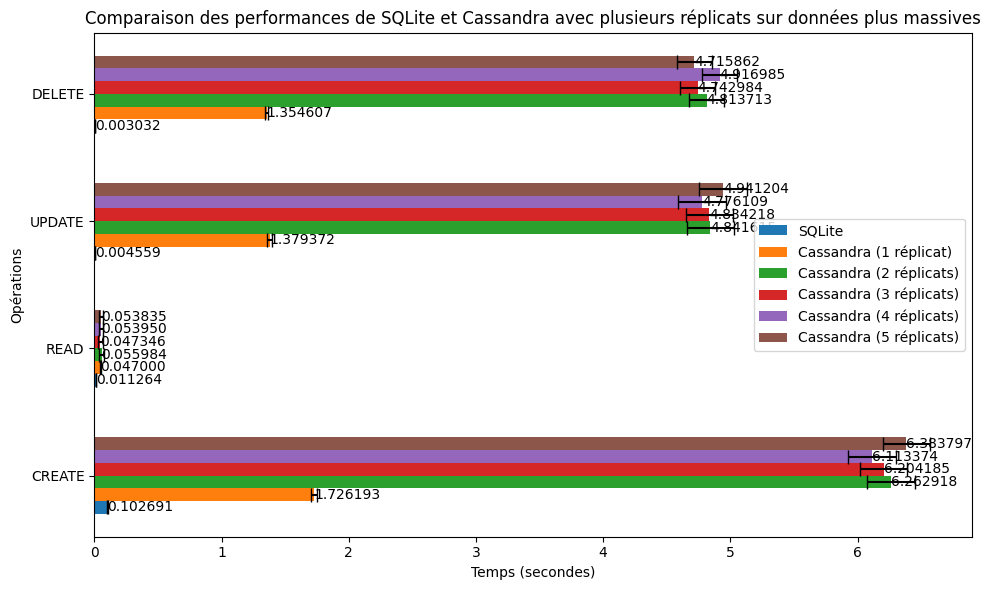

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de temps pour SQLite
sqlite_times = {
    'CREATE': (create_sqlite_massive_mean, create_sqlite_massive_std),
    'READ': (read_sqlite_massive_mean, read_sqlite_massive_std),
    'UPDATE': (update_sqlite_massive_mean, update_sqlite_massive_std),
    'DELETE': (delete_sqlite_massive_mean, delete_sqlite_massive_std)
}

# Valeurs de temps pour Cassandra avec 1 réplicat
cassandra_times = {
    'CREATE': (create_cassandra_massive_mean, create_cassandra_massive_std),
    'READ': (read_cassandra_massive_mean, read_cassandra_massive_std),
    'UPDATE': (update_cassandra_massive_mean, update_cassandra_massive_std),
    'DELETE': (delete_cassandra_massive_mean, delete_cassandra_massive_std)
}

cassandra_times_2 = {
    'CREATE': (create_cassandra_massive_mean_2, create_cassandra_massive_std_2),
    'READ': (read_cassandra_massive_mean_2, read_cassandra_massive_std_2),
    'UPDATE': (update_cassandra_massive_mean_2, update_cassandra_massive_std_2),
    'DELETE': (delete_cassandra_massive_mean_2, delete_cassandra_massive_std_2)
}


cassandra_times_3 = {
    'CREATE': (create_cassandra_massive_mean_3, create_cassandra_massive_std_3),
    'READ': (read_cassandra_massive_mean_3, read_cassandra_massive_std_3),
    'UPDATE': (update_cassandra_massive_mean_3, update_cassandra_massive_std_3),
    'DELETE': (delete_cassandra_massive_mean_3, delete_cassandra_massive_std_3)
}


cassandra_times_4 = {
    'CREATE': (create_cassandra_massive_mean_4, create_cassandra_massive_std_4),
    'READ': (read_cassandra_massive_mean_4, read_cassandra_massive_std_4),
    'UPDATE': (update_cassandra_massive_mean_4, update_cassandra_massive_std_4),
    'DELETE': (delete_cassandra_massive_mean_4, delete_cassandra_massive_std_4)
}


cassandra_times_5 = {
    'CREATE': (create_cassandra_massive_mean_5, create_cassandra_massive_std_5),
    'READ': (read_cassandra_massive_mean_5, read_cassandra_massive_std_5),
    'UPDATE': (update_cassandra_massive_mean_5, update_cassandra_massive_std_5),
    'DELETE': (delete_cassandra_massive_mean_5, delete_cassandra_massive_std_5)
}

# Extraire les opérations
operations = ['CREATE', 'READ', 'UPDATE', 'DELETE']

# Extraire les temps moyens et écarts-types pour chaque système
sqlite_means = [sqlite_times[op][0] for op in operations]
sqlite_stds = [sqlite_times[op][1] for op in operations]

cassandra_means = [cassandra_times[op][0] for op in operations]
cassandra_stds = [cassandra_times[op][1] for op in operations]

cassandra_means_2 = [cassandra_times_2[op][0] for op in operations]
cassandra_stds_2 = [cassandra_times_2[op][1] for op in operations]

cassandra_means_3 = [cassandra_times_3[op][0] for op in operations]
cassandra_stds_3 = [cassandra_times_3[op][1] for op in operations]

cassandra_means_4 = [cassandra_times_4[op][0] for op in operations]
cassandra_stds_4 = [cassandra_times_4[op][1] for op in operations]

cassandra_means_5 = [cassandra_times_5[op][0] for op in operations]
cassandra_stds_5 = [cassandra_times_5[op][1] for op in operations]

# Position des barres sur l'axe y
y = np.arange(len(operations))

# Largeur des barres
height = 0.1

# Créer un graphique horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres pour SQLite et Cassandra avec réplicats
bars1 = ax.barh(y - 2.5 * height, sqlite_means, height, xerr=sqlite_stds, label='SQLite', capsize=5)
bars2 = ax.barh(y - 1.5 * height, cassandra_means, height, xerr=cassandra_stds, label='Cassandra (1 réplicat)', capsize=5)
bars3 = ax.barh(y - 0.5 * height, cassandra_means_2, height, xerr=cassandra_stds_2, label='Cassandra (2 réplicats)', capsize=5)

# Ajouter des barres supplémentaires pour les autres réplicats si nécessaire
bars4 = ax.barh(y + 0.5 * height, cassandra_means_3, height, xerr=cassandra_stds_2, label='Cassandra (3 réplicats)', capsize=5)
bars5 = ax.barh(y + 1.5 * height, cassandra_means_4, height, xerr=cassandra_stds_2, label='Cassandra (4 réplicats)', capsize=5)
bars6 = ax.barh(y + 2.5 * height, cassandra_means_5, height, xerr=cassandra_stds_2, label='Cassandra (5 réplicats)', capsize=5)

# Ajouter des labels et des titres
ax.set_xlabel('Temps (secondes)')
ax.set_ylabel('Opérations')
ax.set_title('Comparaison des performances de SQLite et Cassandra avec plusieurs réplicats sur données plus massives')
ax.set_yticks(y)
ax.set_yticklabels(operations)
ax.legend()

# Afficher les valeurs sur les barres
def add_values(bars):
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.6f}', va='center', ha='left')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)
add_values(bars5)
add_values(bars6)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Comparaison avec / sans index

In [71]:
def cassandra_create_indexes(columns):
    start_time = time.time()
    for column in columns:
        index_query = f"CREATE INDEX {column}_idx ON shows ({column});"
        session.execute(index_query)
    cassandra_time = time.time() - start_time
    return cassandra_time


def sqlite_create_indexes(columns):
    start_time = time.time()
    for column in columns:
        # Créer une requête SQL pour chaque colonne
        index_query = f"CREATE INDEX IF NOT EXISTS {column}_idx ON shows ({column});"
        cursor.execute(index_query)
    sqlite_time = time.time() - start_time
    return sqlite_time

columns_to_index = ["release_year"]
cassandra_time_index = cassandra_create_indexes(columns_to_index)
sqlite_time_index = sqlite_create_indexes(columns_to_index)

print(f"Indexation time: Cassandra {cassandra_time_index:.5f}s, SQLite {sqlite_time_index:.5f}s")

Indexation time: Cassandra 0.19914s, SQLite 0.00008s


In [72]:
# Fonctions pour CRUD SQLite avec index

# --- CREATE ---
def sqlite_insert_index(df):
    drop_table_sqlite()
    create_table_sqlite()
    sqlite_create_indexes(columns_to_index)

    columns = ', '.join(df.columns)
    placeholders = ', '.join(['?'] * len(df.columns))
    insert_query = f"INSERT INTO shows ({columns}) VALUES ({placeholders})"

    start_time = time.time()
    for _, row in df.iterrows():
      cursor.execute(insert_query, tuple(row))
    conn.commit()

    create_time_sqlite = time.time() - start_time
    print(f"Create Time: {create_time_sqlite:.6f} seconds")
    return create_time_sqlite

# --- READ ---
def sqlite_read_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("SELECT * FROM shows WHERE release_year > 2000")
    result = cursor.fetchall()
    read_time_sqlite = time.time() - start_time
    print(f"Read Time: {read_time_sqlite:.6f} seconds")
    print(f"Queried {len(result)} records")
    return read_time_sqlite

# --- UPDATE ---
def sqlite_update_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("UPDATE shows SET rating='PG' WHERE release_year > 2000")
    conn.commit()
    update_time_sqlite = time.time() - start_time
    print(f"Update Time: {update_time_sqlite:.6f} seconds")
    return update_time_sqlite

# --- DELETE ---
def sqlite_delete_index(df):
    sqlite_insert_index(df)
    start_time = time.time()
    cursor.execute("DELETE FROM shows WHERE release_year > 2000")
    conn.commit()
    delete_time_sqlite = time.time() - start_time
    print(f"Delete Time: {delete_time_sqlite:.6f} seconds")
    return delete_time_sqlite

In [73]:
# Fonctions pour CRUD Cassandra avec index
# --- CREATE ---
def cassandra_insert_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques

    drop_table_cassandra()
    create_table_cassandra(nb_repl)
    cassandra_create_indexes(columns_to_index)

    insert_query = session.prepare("INSERT INTO shows (show_id, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)")

    start_time = time.time()
    for _, row in df.iterrows():
        session.execute(insert_query, (row['show_id'], row['title'], row['director'], row['cast'], row['country'], row['date_added'], row['release_year'], row['rating'], row['duration'], row['listed_in'], row['description']))
    create_time = time.time() - start_time

    print(f"Create Time: {create_time:.6f} seconds")

    return create_time


# --- READ ---
def cassandra_read_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    start_time = time.time()
    result = session.execute('SELECT * FROM shows WHERE release_year > 2000;')
    read_time = time.time() - start_time
    print(f"Read time with index: {read_time:.5f}s")
    num_records = sum(1 for _ in result)
    print(f"Number of records: {num_records}")
    return read_time 


# --- UPDATE ---
def cassandra_update_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    start_time = time.time()
    update_query = "UPDATE shows SET rating = 'PG' WHERE release_year > 2000;"
    session.execute(update_query)
    update_time = time.time() - start_time
    print(f"Update time with index: {update_time:.5f}s")
    return update_time


# --- DELETE ---
def cassandra_delete_index(*args):
    df = args[0]  # Premier argument, qui est le DataFrame
    nb_repl = args[1]  # Deuxième argument, qui est le nombre de répliques
    cassandra_insert_index(df, nb_repl)

    start_time = time.time()
    delete_query = "DELETE FROM shows WHERE release_year > 2000;"
    session.execute(delete_query)
    delete_time = time.time() - start_time
    print(f"Delete time with index: {delete_time:.5f}s")
    return delete_time

In [ ]:
# sqlite 
# --- CREATE ---
create_sqlite_massive_mean_index, create_sqlite_massive_std_index = benchmark_operation(sqlite_insert_index, large_df)
print(f"CREATE: Mean Time = {create_sqlite_massive_mean_index:.6f}s, Std Time = {create_sqlite_massive_std_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_sqlite_massive_mean_index, read_sqlite_massive_std_index = benchmark_operation(sqlite_read_index, large_df)
print(f"READ: Mean Time = {read_sqlite_massive_mean_index:.6f}s, Std Time = {read_sqlite_massive_std_index:.6f}s")

# --- UPDATE ---
update_sqlite_massive_mean_index, update_sqlite_massive_std_index = benchmark_operation(sqlite_update_index, large_df)
print(f"UPDATE: Mean Time = {update_sqlite_massive_mean_index:.6f}s, Std Time = {update_sqlite_massive_std_index:.6f}s")

# --- DELETE ---
delete_sqlite_massive_mean_index, delete_sqlite_massive_std_index = benchmark_operation(sqlite_delete_index, large_df)
print(f"DELETE: Mean Time = {delete_sqlite_massive_mean_index:.6f}s, Std Time = {delete_sqlite_massive_std_index:.6f}s")

Create Time: 0.442377 seconds
Create Time: 0.423106 seconds
Create Time: 0.399506 seconds
Create Time: 0.388567 seconds
Create Time: 0.384273 seconds
CREATE: Mean Time = 0.407566s, Std Time = 0.022008s
Total rows in 'shows' table: 30000
Create Time: 0.388892 seconds
Read Time: 0.042397 seconds
Queried 28110 records


In [ ]:
# Cassandra

# 1 replica
# --- CREATE ---
create_cassandra_mean_index, create_cassandra_std_index = benchmark_operation(cassandra_insert_index, large_df, 1)
print(f"CREATE: Mean Time = {create_cassandra_mean_index:.6f}s, Std Time = {create_cassandra_std_index:.6f}s")

# Vérifier le nombre de lignes insérées
result = session.execute('SELECT COUNT(*) FROM shows')
row = result.one()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_mean_index, read_cassandra_std_index = benchmark_operation(cassandra_read_index, large_df, 1)
print(f"READ: Mean Time = {read_cassandra_mean_index:.6f}s, Std Time = {read_cassandra_std_index:.6f}s")

# --- UPDATE ---
update_cassandra_mean_index, update_cassandra_std_index = benchmark_operation(cassandra_update_index, large_df, 1)
print(f"UPDATE: Mean Time = {update_cassandra_mean_index:.6f}s, Std Time = {update_cassandra_std_index:.6f}s")

# --- DELETE ---
delete_cassandra_mean_index, delete_cassandra_std_index = benchmark_operation(cassandra_delete_index, large_df, 1)
print(f"DELETE: Mean Time = {delete_cassandra_mean_index:.6f}s, Std Time = {delete_cassandra_std_index:.6f}s")

# 2 replicas
# --- CREATE ---
create_cassandra_massive_mean_2_index, create_cassandra_massive_std_2_index = benchmark_operation(cassandra_insert_index, large_df, 2)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_2_index:.6f}s, Std Time = {create_cassandra_massive_std_2_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_2_index, read_cassandra_massive_std_2_index = benchmark_operation(cassandra_read_index, large_df, 2)
print(f"READ: Mean Time = {read_cassandra_massive_mean_2_index:.6f}s, Std Time = {read_cassandra_massive_std_2_index:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_2_index, update_cassandra_massive_std_2_index = benchmark_operation(cassandra_update_index, large_df, 2)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_2_index:.6f}s, Std Time = {update_cassandra_massive_std_2_index:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_2_index, delete_cassandra_massive_std_2_index = benchmark_operation(cassandra_delete_index, large_df, 2)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_2_index:.6f}s, Std Time = {delete_cassandra_massive_std_2_index:.6f}s")

# 3 replicas
# --- CREATE ---
create_cassandra_massive_mean_3_index, create_cassandra_massive_std_3_index = benchmark_operation(cassandra_insert_index, large_df, 3)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_3_index:.6f}s, Std Time = {create_cassandra_massive_std_3_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_3_index, read_cassandra_massive_std_3_index = benchmark_operation(cassandra_read_index, large_df, 3)
print(f"READ: Mean Time = {read_cassandra_massive_mean_3_index:.6f}s, Std Time = {read_cassandra_massive_std_3_index:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_3_index, update_cassandra_massive_std_3_index = benchmark_operation(cassandra_update_index, large_df, 3)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_3_index:.6f}s, Std Time = {update_cassandra_massive_std_3_index:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_3_index, delete_cassandra_massive_std_3_index = benchmark_operation(cassandra_delete_index, large_df, 3)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_3_index:.6f}s, Std Time = {delete_cassandra_massive_std_3_index:.6f}s")


# 4 replicas
# --- CREATE ---
create_cassandra_massive_mean_4_index, create_cassandra_massive_std_4_index = benchmark_operation(cassandra_insert_index, large_df, 4)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_4_index:.6f}s, Std Time = {create_cassandra_massive_std_4_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_4_index, read_cassandra_massive_std_4_index = benchmark_operation(cassandra_read_index, large_df, 4)
print(f"READ: Mean Time = {read_cassandra_massive_mean_4_index:.6f}s, Std Time = {read_cassandra_massive_std_4_index:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_4_index, update_cassandra_massive_std_4_index = benchmark_operation(cassandra_update_index, large_df, 4)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_4_index:.6f}s, Std Time = {update_cassandra_massive_std_4_index:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_4_index, delete_cassandra_massive_std_4_index = benchmark_operation(cassandra_delete_index, large_df, 4)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_4_index:.6f}s, Std Time = {delete_cassandra_massive_std_4_index:.6f}s")

# 5 replicas
# --- CREATE ---
create_cassandra_massive_mean_5_index, create_cassandra_massive_std_5_index = benchmark_operation(cassandra_insert_index, large_df, 5)
print(f"CREATE: Mean Time = {create_cassandra_massive_mean_5_index:.6f}s, Std Time = {create_cassandra_massive_std_5_index:.6f}s")

# Vérifier le nombre de lignes insérées
cursor.execute('SELECT COUNT(*) FROM shows')
row = cursor.fetchone()
print(f"Total rows in 'shows' table: {row[0]}")

# --- READ ---
read_cassandra_massive_mean_5_index, read_cassandra_massive_std_5_index = benchmark_operation(cassandra_read_index, large_df, 5)
print(f"READ: Mean Time = {read_cassandra_massive_mean_5_index:.6f}s, Std Time = {read_cassandra_massive_std_5_index:.6f}s")

# --- UPDATE ---
update_cassandra_massive_mean_5_index, update_cassandra_massive_std_5_index = benchmark_operation(cassandra_update_index, large_df, 5)
print(f"UPDATE: Mean Time = {update_cassandra_massive_mean_5_index:.6f}s, Std Time = {update_cassandra_massive_std_5_index:.6f}s")

# --- DELETE ---
delete_cassandra_massive_mean_5_index, delete_cassandra_massive_std_5_index = benchmark_operation(cassandra_delete_index, large_df, 5)
print(f"DELETE: Mean Time = {delete_cassandra_massive_mean_5_index:.6f}s, Std Time = {delete_cassandra_massive_std_5_index:.6f}s")

NameError: name 'cassandra_insert_index' is not defined

In [ ]:
# # TODO : 
# import matplotlib.pyplot as plt
# import numpy as np

# # Données simulées
# replication_factors = [1, 2, 3, 4, 5]
# insertion_mean = [0.3, 0.35, 0.4, 0.45, 0.5]
# insertion_std = [0.02, 0.03, 0.04, 0.05, 0.06]

# # Graphique
# plt.figure(figsize=(10, 6))
# plt.errorbar(replication_factors, insertion_mean, yerr=insertion_std, fmt='o-', capsize=5, label="Insertion Time")

# plt.title("Performance en fonction du Replication Factor")
# plt.xlabel("Replication Factor")
# plt.ylabel("Time (s)")
# plt.legend()
# plt.grid(True)
# plt.show()


# # Données simulées
# x = np.array(replication_factors)
# insert_mean = np.array(insertion_mean)
# insert_std = np.array(insertion_std)

# plt.figure(figsize=(10, 6))
# plt.plot(x, insert_mean, 'o-', label="Insertion Time")
# plt.fill_between(x, insert_mean - insert_std, insert_mean + insert_std, alpha=0.2, label="Insertion Uncertainty")

# plt.title("Performance avec zones d'incertitude")
# plt.xlabel("Replication Factor")
# plt.ylabel("Time (s)")
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(cassandra_times_update, label="Cassandra Update", marker='o')
# plt.plot(mysql_times_update, label="MySQL Update", marker='x')
# plt.xlabel("Itérations")
# plt.ylabel("Temps (secondes)")
# plt.title("Benchmark des mises à jour (Update) entre Cassandra et MySQL")
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(cassandra_times_delete, label="Cassandra Delete", marker='o')
# plt.plot(mysql_times_delete, label="MySQL Delete", marker='x')
# plt.xlabel("Itérations")
# plt.ylabel("Temps (secondes)")
# plt.title("Benchmark des suppressions (Delete) entre Cassandra et MySQL")
# plt.legend()
# plt.grid()
# plt.show()


TODO : index secondaire ?

Indexation des colonnes utilisées dans les filtres, jointures et ordonnancement (ORDER BY).  
Seulement ces colonnes sinon le coût de stockage est trop élevé pour rien.

In [ ]:
# Vérification des index
index_query = "SELECT * FROM system_schema.indexes WHERE keyspace_name = 'netflix';"
rows = cassandra_session.execute(index_query)
print("Index existants dans Cassandra :")
for row in rows:
    print(row)

index_query_mysql = "SHOW INDEX FROM shows;"
with mysql_engine.connect() as conn:
    conn.execute(text("USE TDLE;"))
    result = conn.execute(text(index_query_mysql))
    print("Index existants dans MySQL :")
    for row in result:
        print(row)

In [ ]:

# TODO :  Analyser les résultats
# TODO : Tester avec des requêtes plus complexes
# TODO : Utiliser un dataset plus grand
# TODO : Ajouter des colonnes à indexer
# Tous ces TODO n'ont rien changé.

### Cassandra - Résultats

In [ ]:
average_times = results_df.iloc[:, 1:].mean()

for col in ['Insertion Time', 'Read Time', 'Update Time', 'Delete Time']:
    results_df[col] = results_df[col].apply(lambda x: sum(x)/len(x) if isinstance(x, list) else x)

average_times = results_df.iloc[:, 1:].mean()

fig = go.Figure()


for rf in results_df['Replication Factor']:
    values = results_df[results_df['Replication Factor'] == rf].iloc[0, 1:].values
    values = [float(v) for v in values]

    fig.add_trace(go.Bar(x=['Insertion Time', 'Read Time', 'Update Time', 'Delete Time'], y=values, name=f'Replication Factor {rf}', text=[f"{v:.3f}s" for v in values], textposition='auto'))

fig.update_layout(title="Temps d'exécution des opérations CRUD par facteur de réplication", xaxis_title="Opérations CRUD", yaxis_title="Temps d'exécution (secondes)", barmode='group', template='plotly_white', legend=dict(title="Replication Factor"))

fig.show()

# Fin du notebook

In [ ]:
# Tout fermer proprement
session.shutdown() # Fermer la connexion Cassandra
cluster.shutdown() # Fermer la connexion Cassandra
mysql_engine.dispose() # Fermer la connexion MySQL

# Sources

- http://www-igm.univ-mlv.fr/~dr/XPOSE2010/Cassandra/modele.html